In [1]:
import pandas as pd
import numpy as np

path = "//home/font/Data/MM/neepu/"
filename_haikou_hp = '海口房价.csv'
data_haikou_hp = pd.read_csv((path+filename_haikou_hp),index_col='Time')

data_haikou_hp.index = pd.to_datetime(data_haikou_hp.index)
# data_haikou_hp = data_haikou_hp['2013-5':'2018-4']

# data_haikou_hp['HP'] = np.log(data_haikou_hp['HP'])
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
    
# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

/home/font/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


进行ADF检验得到,海口的房价以及房价一阶差分的时间序列非平稳,进行二阶差分的建模
绘图----->二阶差分


<Figure size 432x288 with 0 Axes>

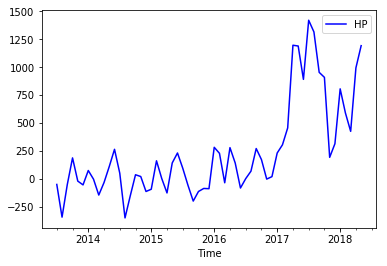

偏相关图与自相关图


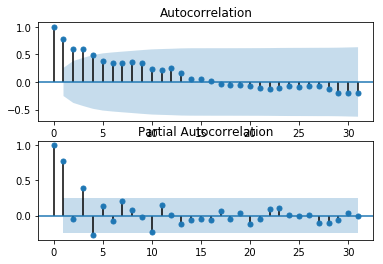

ADF检验与语言描述


Test Statistic                  0.671838
p-value                         0.989259
#Lags Used                     10.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64

In [2]:
print("进行ADF检验得到,海口的房价以及房价一阶差分的时间序列非平稳,进行二阶差分的建模")
data_haikou_hp_new = data_haikou_hp.diff(2)

data_haikou_hp_new.dropna(inplace=True)
print("绘图----->二阶差分")
draw_ts(data_haikou_hp_new)
print("偏相关图与自相关图")
draw_acf_pacf(data_haikou_hp_new)
print("ADF检验与语言描述")
testStationarity(data_haikou_hp_new['HP'])

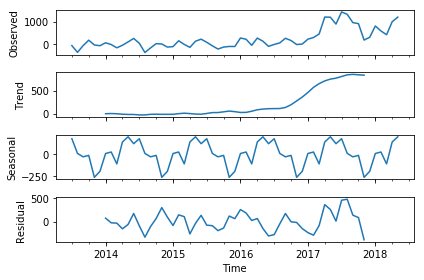

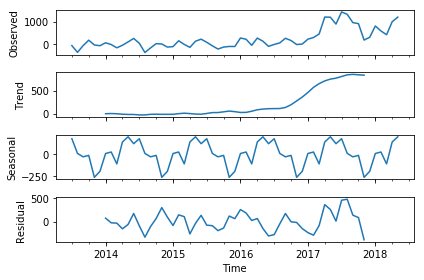

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_haikou_hp_new, model="additive")
'''
所谓分解就是将时序数据分离成不同的成分。
statsmodels使用的X-11分解过程，它主要将时序数据分离成长期趋势、季节趋势和随机成分。
与其它统计软件一样，statsmodels也支持两类分解模型，加法模型和乘法模型，
这里使用加法，乘法只需将model的参数设置为"multiplicative"即可。
'''
# Obseved 原始图形
# trend = decomposition.trend # 趋势变化
# seasonal = decomposition.seasonal # 年周期变化
# residual = decomposition.resid # 随机变化

decomposition.plot()

<Figure size 432x288 with 0 Axes>

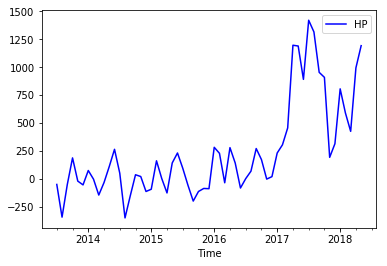

In [4]:
from statsmodels.tsa.arima_model import ARMA
draw_ts(data_haikou_hp_new)

In [5]:
from statsmodels.tsa.arima_model import ARMA

data_haikou_hp_new['HP'] =np.array(data_haikou_hp_new['HP'],dtype=np.float)
model = ARMA(data_haikou_hp_new, order=(1, 1)) 
result_arma_2 = model.fit(disp=-1, method='css')
predict_data = result_arma_2.predict('2018-5-01', '2019-5-01', dynamic=True)
print(predict_data)

2018-05-01    1181.891463
2018-06-01     762.781699
2018-07-01     524.823534
2018-08-01     389.717905
2018-09-01     313.008912
2018-10-01     269.455809
2018-11-01     244.727641
2018-12-01     230.687716
2019-01-01     222.716261
2019-02-01     218.190304
2019-03-01     215.620599
2019-04-01     214.161596
2019-05-01     213.333217
Freq: MS, dtype: float64


In [8]:
haikou_list = list(data_haikou_hp[-2:].values)
print(haikou_list)
predict_data_list = list(predict_data)

finaldata_list = []
finaldata_list.append(13598)
finaldata_list.append(14435)
# print(finaldata_list[-2])
for i in range(len(predict_data_list)):
    finaldata_list.append(finaldata_list[-2]+predict_data_list[i]*2.89)
    print(finaldata_list[-1])
finaldata_list = finaldata_list[2:]
# print(finaldata_list)
# print(len(finaldata_list))

[array([14435]), array([14791])]
17013.666327784253
16639.43910996156
18530.40634054741
17765.723854441003
19435.002097573484
18544.45114163153
20142.264979243755
19211.138641214166
20785.914973377738
19841.70861909222
21409.058503733657
20460.63563153869
22025.591501649258
